<a href="https://colab.research.google.com/github/prashanth741/AIML/blob/main/2303A51270_setA_2_B_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 5 Global_active_power values:
 Global_active_power
?        25979
0.218     9565
0.216     9363
0.322     9350
0.324     9304
Name: count, dtype: int64


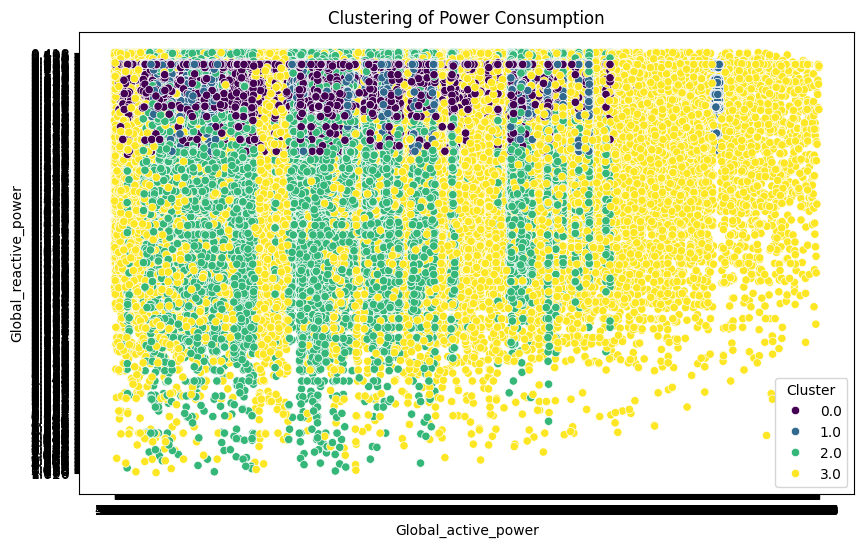

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = "household_power_consumption.txt"
data = pd.read_csv(file_path, delimiter=';', low_memory=False)


top_power = data['Global_active_power'].value_counts().head(5)




X_cluster = data[['Global_active_power', 'Global_reactive_power']].copy()  # Create a copy to avoid SettingWithCopyWarning


X_cluster['Global_active_power'] = pd.to_numeric(X_cluster['Global_active_power'], errors='coerce')
X_cluster['Global_reactive_power'] = pd.to_numeric(X_cluster['Global_reactive_power'], errors='coerce')


X_cluster = X_cluster.dropna()


scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)


data['Cluster'] = pd.Series(clusters, index=X_cluster.index)


print("Top 5 Global_active_power values:\n", top_power)



plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Global_active_power'], y=data['Global_reactive_power'], hue=data['Cluster'], palette='viridis')
plt.title("Clustering of Power Consumption")
plt.show()